In [204]:
import requests
import json
import pandas as pd

# getting data from data.gov.sg

def get_stuff(limit=100):
    url = "https://data.gov.sg/api/action/datastore_search"

    querystring = {"resource_id":"1b702208-44bf-4829-b620-4615ee19b57c", "limit":limit}

    headers = {
        'Cache-Control': "no-cache",
        'Postman-Token': "23703fe5-5aae-43d3-bac4-6a02327541a6"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    #print(response.text)
    return json.loads(response.text)
 

def update_stuff():
    stuff = get_stuff(60000)
    #print(stuff['result']['total'])
    #print(len(stuff['result']['records']))
    with open('resale.json', 'w') as outfile:
        json.dump(stuff, outfile) 

def load_stuff():
    stuff = json.load(open('resale.json'))
    return pd.io.json.json_normalize(stuff['result']['records'])

df = load_stuff()
df_ge = df[(df['town'] == 'GEYLANG') & (df['month'].str.startswith('2017')) & (df['flat_type'] == '3 ROOM')]
df_ge = df_ge.sort_values('resale_price', ascending=False)
df_ge.reset_index(drop=True)


,_id,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,49187,12,New Generation,3 ROOM,82,1981,2017-08,62,502000,10 TO 12,PINE CL,GEYLANG
1,56450,12,New Generation,3 ROOM,82,1981,2017-12,62,478000,04 TO 06,PINE CL,GEYLANG
2,43755,12,New Generation,3 ROOM,82,1981,2017-05,63,473888,04 TO 06,PINE CL,GEYLANG
3,47394,33,Model A,3 ROOM,60,2007,2017-07,88,468000,10 TO 12,EUNOS CRES,GEYLANG
4,38671,4,Model A,3 ROOM,74,1985,2017-02,67,460000,13 TO 15,JOO CHIAT RD,GEYLANG
5,37549,33,Model A,3 ROOM,60,2007,2017-01,89,459888,16 TO 18,EUNOS CRES,GEYLANG
6,56444,32,Model A,3 ROOM,60,2007,2017-12,88,458888,16 TO 18,EUNOS CRES,GEYLANG
7,45643,31,Model A,3 ROOM,60,2007,2017-06,88,453000,13 TO 15,EUNOS CRES,GEYLANG
8,38674,10,New Generation,3 ROOM,68,1981,2017-02,63,450000,13 TO 15,PINE CL,GEYLANG
9,56448,4,Model A,3 ROOM,90,1985,2017-12,67,450000,07 TO 09,JOO CHIAT RD,GEYLANG


In [205]:
import lxml.html as LH
from lxml.etree import tostring
from pathlib import Path

# getting data from hdb, additional html scraping required

def towns():
    towns = {'AMK': 'AMK     Ang Mo Kio',
    'Ang Mo Kio': 'AMK     Ang Mo Kio',
    'BB': 'BB      Bukit Batok',
    'BD': 'BD      Bedok',
    'BH': 'BH      Bishan',
    'BM': 'BM      Bukit Merah',
    'BP': 'BP      Bukit Panjang',
    'BT': 'BT      Bukit Timah',
    'Bedok': 'BD      Bedok',
    'Bishan': 'BH      Bishan',
    'Bukit Batok': 'BB      Bukit Batok',
    'Bukit Merah': 'BM      Bukit Merah',
    'Bukit Panjang': 'BP      Bukit Panjang',
    'Bukit Timah': 'BT      Bukit Timah',
    'CCK': 'CCK     Choa Chu Kang',
    'CL': 'CL      Clementi',
    'CT': 'CT      Central Area',
    'Central Area': 'CT      Central Area',
    'Choa Chu Kang': 'CCK     Choa Chu Kang',
    'Clementi': 'CL      Clementi',
    'GL': 'GL      Geylang',
    'Geylang': 'GL      Geylang',
    'HG': 'HG      Hougang',
    'Hougang': 'HG      Hougang',
    'JE': 'JE      Jurong East',
    'JW': 'JW      Jurong West',
    'Jurong East': 'JE      Jurong East',
    'Jurong West': 'JW      Jurong West',
    'KWN': 'KWN     Kallang/Whampoa',
    'Kallang/Whampoa': 'KWN     Kallang/Whampoa',
    'MP': 'MP      Marine Parade',
    'Marine Parade': 'MP      Marine Parade',
    'PG': 'PG      Punggol',
    'PRC': 'PRC     Pasir Ris',
    'Pasir Ris': 'PRC     Pasir Ris',
    'Punggol': 'PG      Punggol',
    'QT': 'QT      Queenstown',
    'Queenstown': 'QT      Queenstown',
    'SB': 'SB      Sembawang',
    'SGN': 'SGN     Serangoon',
    'SK': 'SK      Sengkang',
    'Sembawang': 'SB      Sembawang',
    'Sengkang': 'SK      Sengkang',
    'Serangoon': 'SGN     Serangoon',
    'TAP': 'TAP     Tampines',
    'TG': 'TG      Tengah',
    'TP': 'TP      Toa Payoh',
    'Tampines': 'TAP     Tampines',
    'Tengah': 'TG      Tengah',
    'Toa Payoh': 'TP      Toa Payoh',
    'WL': 'WL      Woodlands',
    'Woodlands': 'WL      Woodlands',
    'YS': 'YS      Yishun',
    'Yishun': 'YS      Yishun'}
    return towns

def keys(): 
    return [ k for k in towns().keys() if len(k) > 3 ]

def find_town(town): 
    return towns()[town]


def resale_by_town(town="Bishan", flat_type="03"):

    url = "https://services2.hdb.gov.sg/webapp/BB33RTIS/BB33SSearchWidget"

    payload = {
        "FLAT_TYPE": flat_type,
        "NME_NEWTOWN": find_town(town),
        "dteRange":48,
        "DTE_APPROVAL_FROM": "May 2011",
        "DTE_APPROVAL_TO": "May 2018",
        "Process": "continue",
        "null": "null"
    }
    headers = {
        'X-Requested-With': "XMLHttpRequest",
        'Host': "services2.hdb.gov.sg",
        'Referer': "https://services2.hdb.gov.sg/webapp/BB33RTIS/",
        'Origin': "https://services2.hdb.gov.sg",
        'Content-Type': "application/x-www-form-urlencoded",
        'Cache-Control': "no-cache",
        'Postman-Token': "9b789007-a7e4-42ac-920b-ce78eb4b7e4e",
        'User-Agent': "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36"
    }

    filename = town + "_" + flat_type + ".json"
    filename = filename.replace("/", "")
    filepath = 'hdb_json/' + filename
    if Path(filepath).is_file():
        data = json.load(open(filepath))
        print('already have:', filename)
        result = pd.read_json(data)
        result['flat_type'] = flat_type
        result['town'] = town
        return result
    
    print('downloading:', filename)
    response = requests.request("POST", url, data=payload, headers=headers)

    result = html_to_df(response.text)
    
    if result is None:
        print("no data:", filename)
        return None
    
    result['flat_type'] = flat_type
    result['town'] = town
    #print(response.text)
    

    # cache the json results
    with open(filepath, 'w') as outfile:
        json.dump(result.to_json(), outfile) 
    return result
    
def html_to_df(text):
    root = LH.fromstring(text)
    result = root.xpath("//div[contains(@class,'show-for-medium-up')]/table")
    if len(result) == 0:
        return None
    
    table_str = tostring(result[0]).decode()
    #print(table_str)
    table_str = table_str.replace("<br/>", "</td><td>")
    data = pd.read_html(table_str)
    #print(tostring(result[0]))
    parsed_table = data[0]
    parsed_table.columns = ['block','street_name','storey_range', 'floor_area_sqm', 'flat_model', 'lease_commencement_date', 'remaining_lease', 'resale_price', 'month']

    return parsed_table

def get_coords(address):
    url = "https://developers.onemap.sg/commonapi/search"

    payload = {
        "searchVal": address,
        "returnGeom": "Y",
        "getAddrDetails": "Y"
    }
    headers = {
        'Cache-Control': "no-cache",
        'Postman-Token': "9b789007-a7e4-42ac-920b-ce78eb4b7e4e",
        'User-Agent': "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36"
    }

    response = requests.request("GET", url, params=payload, headers=headers)

    return json.loads(response.text)['results'][0]


def gather_towns():
    towns = {}
    for n in nodes:
        #print(n.get('value'))
        v = n.get('value')
        code, name = re.split('\s+', n.get('value'), maxsplit=1)
        towns[code] = v
        towns[name] = v
    #print(nodes[1].text)

    return towns

def gather_data():
    all_data = {}
    sizes = ["03", "04", "05"]
    for t in keys():
        for s in sizes:
            result = resale_by_town(t, s)
            if result is not None:
                all_data[t+'_'+s] = result
    return all_data

# get_coords("51 marine ter")

#df = resale_by_town("Woodlands", "03")

import re

ops = LH.fromstring("<option>test</option>")
nodes = ops.xpath("//option")
len(nodes)


1

In [206]:
def gather_all_data():
    all_data = gather_data()
    pd_all = pd.concat(all_data.values(), ignore_index=True)
    pd_all['resale_price'] = pd.to_numeric(pd_all['resale_price'].str.replace('[^\d.]', '')).astype(int)
    pd_all.month = pd.to_datetime(pd_all.month).dt.strftime('%Y-%m')
    return pd_all

In [70]:
#pd_all = gather_all_data()
#pd_all.to_csv('hdb_resale_may18.csv', sep=',', encoding='utf-8') 

### Now that we have the data, finally it is time to plot it..!

In [207]:
def load_resale():
    pd_all = pd.read_csv('hdb_resale_may18.csv', index_col=0)
    pd_all = pd_all.sort_values('month', ascending=False)
    return pd_all

pd_all = load_resale()

In [238]:
def get_by_town_flat_type(town, flat_type):
    all_data = pd_all
    if town == 'All':
        pd_gl = all_data[ (all_data.flat_type == flat_type)]
    else:
        pd_gl = all_data[ (all_data['town'] == town) & (all_data.flat_type == flat_type)]
    pd_gl = pd_gl.sort_values('resale_price', ascending=False)
    pd_gl['year'] = pd.to_datetime(pd_gl.month).dt.strftime('%Y')
    # fix for entries with missing remaining lease
    pd_gl.loc[pd_gl['remaining_lease'] == '- years', 'remaining_lease'] = (pd_gl['lease_commencement_date'] + 99 - 2018).astype(str) + ' years'
    # print(pd_gl['remaining_lease'].unique())
    pd_gl['remaining_lease'] = pd.to_numeric(pd_gl['remaining_lease'].str.replace('[^\d.]', '')) #.astype(int)
    # print(pd_gl['remaining_lease'].unique())
    pd_gl['unit_price'] = pd_gl.resale_price / pd_gl.floor_area_sqm / pd_gl.remaining_lease
    return pd_gl

pd_gl = get_by_town_flat_type('Geylang', 3)
pd_gl

,block,flat_model,floor_area_sqm,lease_commencement_date,month,remaining_lease,resale_price,storey_range,street_name,town,flat_type,year,unit_price
11811,12,New Generation,82.0,1981,2017-08,62,502000,10 to 12,Pine Cl,Geylang,3,2017,98.741149
12197,12,New Generation,82.0,1981,2017-12,62,478000,04 to 06,Pine Cl,Geylang,3,2017,94.020456
11903,12,New Generation,82.0,1981,2017-05,63,473888,04 to 06,Pine Cl,Geylang,3,2017,91.732094
11834,33,Model A,60.0,2007,2017-07,88,468000,10 to 12,Eunos Cres,Geylang,3,2017,88.636364
12105,33,Model A,60.0,2007,2016-07,89,465000,16 to 18,Eunos Cres,Geylang,3,2016,87.078652
12106,35,Model A,60.0,2006,2016-07,89,460000,16 to 18,Eunos Cres,Geylang,3,2016,86.142322
11962,4,Model A,74.0,1985,2017-02,67,460000,13 to 15,Joo Chiat Rd,Geylang,3,2017,92.779347
11984,33,Model A,60.0,2007,2017-01,89,459888,16 to 18,Eunos Cres,Geylang,3,2017,86.121348
12193,32,Model A,60.0,2007,2017-12,88,458888,16 to 18,Eunos Cres,Geylang,3,2017,86.910606
12129,33,Model A,60.0,2007,2016-06,89,456000,10 to 12,Eunos Cres,Geylang,3,2016,85.393258


resale_price    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

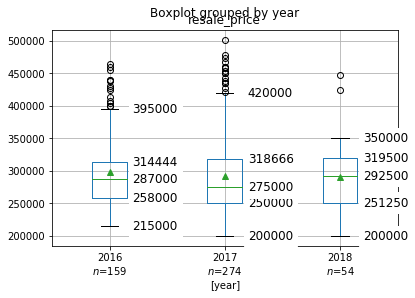

In [243]:
import numpy as np

#%matplotlib inline
#%matplotlib notebook
#groups = pd_gl.groupby('year')
#groups.boxplot('resale_price')

def get_x_tick_labels(df, grouped_by):
    tmp = df.groupby([grouped_by]).size()
    return ["{0}: {1}".format(k,v) for k, v in tmp.to_dict().items()]

def series_values_as_dict(series_object):
    tmp = series_object.to_dict().values()
    return [y for y in tmp][0]

def add_values(bp, ax):
    """ This actually adds the numbers to the various points of the boxplots"""
    for element in ['whiskers', 'medians', 'caps']:
        for line in bp[element]:
            # Get the position of the element. y is the label you want
            (x_l, y),(x_r, _) = line.get_xydata()
            # Make sure datapoints exist 
            # (I've been working with intervals, should not be problem for this case)
            if not np.isnan(y): 
                x_line_center = x_l + (x_r - x_l)/2 + 0.2
                y_line_center = y  # Since it's a line and it's horisontal
                # overlay the value:  on the line, from center to right
                ax.text(x_line_center, y_line_center, # Position
                        '%d' % y, # Value (3f = 3 decimal float)
                        verticalalignment='center', # Centered vertically with line 
                        fontsize=12, backgroundcolor="white")


def town_plot(estate, flat_type=3):
    pd_gl = get_by_town_flat_type(estate, flat_type)
    tt = pd_gl.boxplot(column='resale_price', by=['year'], return_type='both', showmeans=True)

    # print important values                
    series = tt.resale_price.lines
    axes = tt.resale_price.ax
    #dt = series_values_as_dict(series)
    add_values(series, axes)

    # print number of samples (n)
    dfg = pd_gl.groupby('year')
    counts = [len(v) for k, v in dfg]
    total = float(sum(counts))
    cases = len(counts)
    axes.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k, v in dfg])

    return tt

town_plot('Geylang')

**Not working so well since the raw prices are not normalized by remaining lease. Anyway, do some sanity checks on the data..**

In [210]:
pd_gl_2018 = pd_gl[pd_gl.year == '2018']
df_gl_2018 = pd_gl_2018.reset_index(drop=True)
df_gl_2018

,block,flat_model,floor_area_sqm,lease_commencement_date,month,remaining_lease,resale_price,storey_range,street_name,town,flat_type,year,unit_price
0,36,Model A,60.0,2006,2018-01,87,448000,04 to 06,Eunos Cres,Geylang,3,2018,85.823755
1,10,New Generation,68.0,1981,2018-04,62,423888,10 to 12,Pine Cl,Geylang,3,2018,100.542694
2,108,New Generation,68.0,1981,2018-03,62,350000,04 to 06,Aljunied Cres,Geylang,3,2018,83.017078
3,36,Improved,68.0,1986,2018-03,66,350000,04 to 06,Cassia Cres,Geylang,3,2018,77.985740
4,108,New Generation,68.0,1981,2018-03,62,348000,10 to 12,Aljunied Cres,Geylang,3,2018,82.542694
5,108,New Generation,68.0,1981,2018-02,62,346000,10 to 12,Aljunied Cres,Geylang,3,2018,82.068311
6,108,New Generation,68.0,1981,2018-03,62,335000,04 to 06,Aljunied Cres,Geylang,3,2018,79.459203
7,3,Improved,65.0,1976,2018-03,57,335000,10 to 12,Haig Rd,Geylang,3,2018,90.418354
8,21,Improved,75.0,1982,2018-02,63,335000,07 to 09,Eunos Cres,Geylang,3,2018,70.899471
9,101,New Generation,82.0,1978,2018-03,58,330000,04 to 06,Aljunied Cres,Geylang,3,2018,69.386039


In [143]:
np.mean(df_gl_2018.resale_price)

291106.962962963

In [160]:
iqr = np.subtract(*np.percentile(df_gl_2018.resale_price, [75, 25]))
(iqr * 1.5) + np.median(df_gl_2018.resale_price)

394875.0

In [166]:
pd_gl_2017 = pd_gl[pd_gl.year == '2017']
np.mean(pd_gl_2017['unit_price']/12)

6.886008003044656

**Interactive boxplot by selecting Estate and Flat Type**

In [244]:
from ipywidgets import widgets, interactive
estate = widgets.Dropdown(
    options=['All'] + list(keys()),
    value='All',
    description='Estate:',
)

flat_type = widgets.Dropdown(
    options=range(3,6),
    value=3,
    description='Flat Type:',
)
interactive(town_plot, estate=estate, flat_type=flat_type)

interactive(children=(Dropdown(description='Estate:', options=('All', 'Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Bukit Timah', 'Central Area', 'Choa Chu Kang', 'Clementi', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West', 'Kallang/Whampoa', 'Marine Parade', 'Pasir Ris', 'Punggol', 'Queenstown', 'Sembawang', 'Sengkang', 'Serangoon', 'Tampines', 'Tengah', 'Toa Payoh', 'Woodlands', 'Yishun'), value='All'), Dropdown(description='Flat Type:', options=(3, 4, 5), value=3), Output()), _dom_classes=('widget-interact',))